In [119]:
"""@author Okorie Ndubuisi May 2025"""
import numpy as np
import matplotlib.pyplot as plt
from model import Model
import seaborn as sns
import pandas as pd
from algorithms.ml.utils.utils import one_hot_encode
from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets # data from Andrew Ng coursera course
sns.set_theme()

In [120]:
X, Y = load_planar_dataset() # data from Andrew Ng coursera course
X = X.T
Y = Y.T

In [3]:
print(Y.shape)
print(X.shape)

(400, 1)
(400, 2)


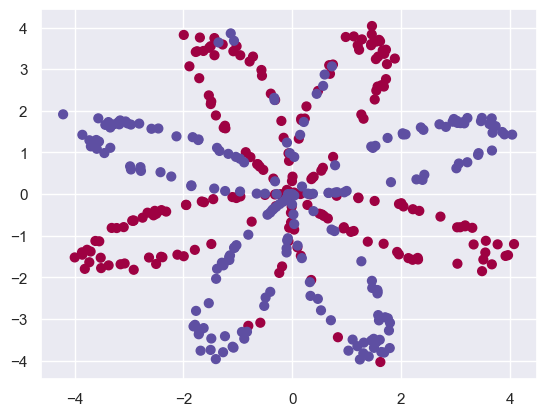

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=Y, s=40, cmap=plt.cm.Spectral);

In [103]:
input_shape = X.shape
print(input_shape)
layers = [7, 4, 1]
dropout_rates = [1, 1, 1]
activations = ['tanh', 'tanh', 'sigmoid']
model = Model(input_shape, layers, activations, dropout_rates=dropout_rates)

(400, 2)


In [104]:
num_iters = 100000
learning_rate = 0.0001
decay=False
normalized = False
optimizer = 'adam'
model.fit(X, Y, num_iters=num_iters,decay=decay,
           learning_rate=learning_rate, 
           tuning_param=1,optimizer=optimizer, normalized=normalized, epochs=1)

Running epoch 1 / 1
Running mini-batch 1 / 1
Iteration    0: Cost 0.82008873   
Iteration 10000: Cost 0.19896469   
Iteration 20000: Cost 0.15214971   
Iteration 30000: Cost 0.14075099   
Iteration 40000: Cost 0.13753127   
Iteration 50000: Cost 0.13569433   
Iteration 60000: Cost 0.13483981   
Iteration 70000: Cost 0.13434195   
Iteration 80000: Cost 0.13429320   
Iteration 90000: Cost 0.13425469   
Iteration 99999: Cost 0.13421966   


In [105]:
# Print train accuracy
predictions = model.predict(X)
model.accuracy(predictions, Y)

Accuracy: 91%


In [106]:
model_layers = model.get_layers()

In [107]:
layer1 = model_layers['layer1']

In [113]:
layer1.weight

array([[-4.1068228 ,  0.53088842],
       [-6.96845658,  1.85950279],
       [-4.85023314,  1.37484708],
       [-1.28000594,  9.55327837],
       [ 0.59076305, 16.12155894],
       [-8.50736086, -8.03254779],
       [ 7.84021324, -9.64922216]])

In [114]:
layer1.bias

array([[ 1.64343206],
       [-0.44317373],
       [-0.78998691],
       [ 0.02605896],
       [-0.02369033],
       [-0.0154626 ],
       [ 0.05561765]])

In [115]:
layer1.name

'layer1'

In [116]:
layer1.units

7

In [117]:
layer1.activation

'tanh'

In [118]:
layer1.trainable

True

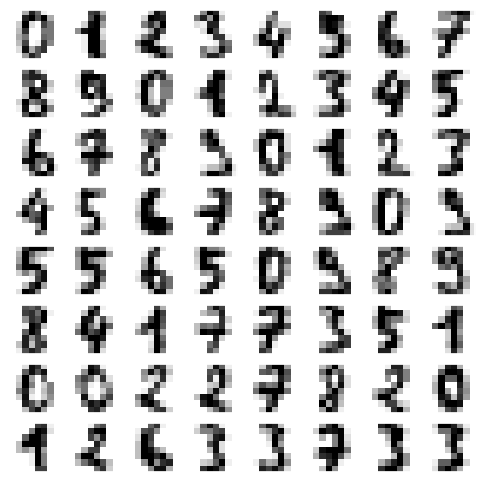

In [69]:
from sklearn.datasets import load_digits
digits = load_digits(n_class=10)
fig, ax = plt.subplots(8, 8, figsize=(6, 6))
for i, axi in enumerate(ax.flat):
    axi.imshow(digits.images[i], cmap='binary')
    axi.set(xticks=[], yticks=[])

In [70]:
X = digits.data[200:, :]
Y = digits.target[200:]
 
X_test = np.array(digits.data[:200, :], dtype=np.float64)
Y_true = digits.target[:200]

In [71]:
print(X.shape)
print(Y.shape)

(1597, 64)
(1597,)


In [72]:
Y[:20]

array([1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7, 6, 3, 2, 1, 7, 3, 1, 3])

In [73]:
Y_train, _ = one_hot_encode(Y, True)

In [74]:
print(Y_train.shape)

(1597, 10)


In [75]:
Y_train[:20]

array([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]])

In [76]:
input_shape = X.shape
layers = [25, 20, 15, 10]
dropout_rates = [1.0, 1.0, 1.0, 1.0]
activations = ['tanh', 'tanh', 'tanh', 'softmax']
model = Model(input_shape, layers, activations, dropout_rates)
num_iters = 1000
learning_rate = 1e-7
decay=True
normalized = False
optimizer = 'adam'
bias = True
model.fit(X, Y_train, num_iters=num_iters, 
          learning_rate=learning_rate,
            tuning_param=1,
            optimizer=optimizer,batch_size=1,
              decay=decay, normalized=normalized, 
          bias=bias, epochs=1)

Running epoch 1 / 1
Running mini-batch 1 / 1
Iteration    0: Cost 3.74081639   
Iteration  100: Cost 3.71125094   
Iteration  200: Cost 3.71113608   
Iteration  300: Cost 3.71099095   
Iteration  400: Cost 3.71082329   
Iteration  500: Cost 3.71063752   
Iteration  600: Cost 3.71043774   
Iteration  700: Cost 3.71022545   
Iteration  800: Cost 3.71000202   
Iteration  900: Cost 3.70976934   
Iteration  999: Cost 3.70953080   


 Let us generate data using  this
linear function for our model test, our model will try to estimate the weights and bias term
of this function, this function has 3 features so our weights will be 3 plus 1 bias term. Our function is truly linear, however it should be noted that in real world application you can hardly see any relationship that is wholely linear. But we will simulate data using this function, our function says: "I will generate dataset using some coefficients and intercept, please find those coefficients and intercept that I used to generate the dataset." So the coefficients are [7, 2, -5] and the intercept is 3. Our model will attempt to find these four values.

In [81]:
f = lambda x1, x2, x3: 7*x1 + 2*x2 - 5*x3 + 3

In [98]:
#Generate the training data using our function
np.random.seed(42)
X = np.random.randint(1, 100, size=(1_000, 3))
Y = f(X[:,0], X[:,1], X[:,2])
Y = Y[:, np.newaxis]
print(X.shape)
print(Y.shape)

#Generate test data using our function
X_test = np.random.randint(1, 10, size=(50, 3))
Y_true = f(X_test[:,0], X_test[:,1], X_test[:,2])
Y_true = Y_true[:, np.newaxis]
print(X_test.shape)
print(Y_true.shape)
input_shape = X.shape

(1000, 3)
(1000, 1)
(50, 3)
(50, 1)


In [100]:
num_iters = 10000
learning_rate = 0.001
decay=False
normalized = False
bias = True
dropout_rates = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
optimizer = 'adam'
layers = [25, 20, 15, 10, 3, 1]
activations = ['relu', 'tanh', 'relu', 'tanh', 'relu', 'linear']
model = Model(input_shape, layers, activations, dropout_rates)
model.fit(X, Y, 
          num_iters=num_iters,
          learning_rate=learning_rate,
          normalized=normalized,
            optimizer=optimizer, decay=decay, bias=bias)

Running epoch 1 / 1
Running mini-batch 1 / 1
Iteration    0: Cost 54104.26386913   
Iteration 1000: Cost 39025793.72703199   
Iteration 2000: Cost 15062121.64429276   
Iteration 3000: Cost 2918238.63385028   
Iteration 4000: Cost 287365.39132940   
Iteration 5000: Cost 32685.99931209   
Iteration 6000: Cost 32685.99932938   
Iteration 7000: Cost 32685.99933997   
Iteration 8000: Cost 32685.99934791   
Iteration 9000: Cost 32685.99935484   
Iteration 9999: Cost 32686.20841293   


Our model is performing really poor, what could possibly be the cause? Anyway, the reason is simple, our data is truly linear so by adding nonlinearity activation function like relu, it shut offf some possible values of Y. We can examine carefully and see Y can actually have negative values but relu is preventing it from having such values. So choice of activation function is really this important in neural network architeural design.

In [92]:
Y[Y < 0]

array([-197,  -47, -271,  -19, -275,  -22, -138,  -80,  -20, -162,  -10,
       -117, -430,  -21, -133,  -38,  -21, -257,  -69, -181,  -56,  -20,
        -21,  -79,  -93,  -37, -262,  -52, -244, -275, -158,  -31, -109,
        -48, -146, -237,   -9, -145, -201, -402,  -83,  -38,   -7, -117,
        -85,  -90, -196, -192, -305,  -89,  -89, -247,  -47,  -12,  -33,
       -282,  -59, -245, -121, -125,  -51,  -95,  -65, -223, -176, -113,
        -53, -244, -103, -142, -229,  -12,  -51, -469,  -82, -177, -151,
        -22,  -29, -133, -235,  -34,  -39, -230,  -43, -186, -151,  -49,
         -3,  -60,  -79, -139, -404, -205,  -79, -192, -101, -192, -248,
        -65,  -83,  -72,  -85, -239, -184,  -29, -119, -194,  -98,  -96,
       -251,  -78,  -33,  -68, -251,  -28, -143,  -48, -117,  -57, -189,
       -209,   -5, -131,  -30, -157, -302, -179,  -51, -234, -181, -222,
       -316,  -48, -162, -128,  -72, -178,  -27,  -15,  -76, -302, -111,
         -4, -202, -110, -275,   -3, -106, -101, -2

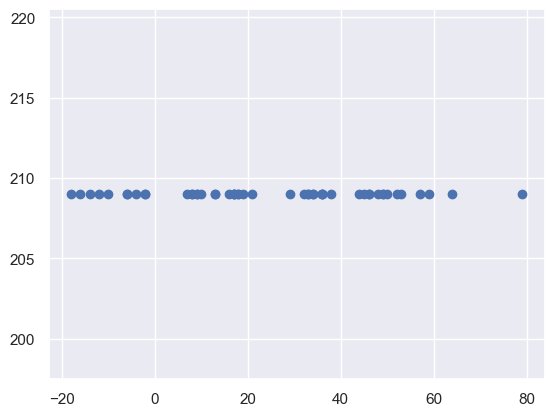

In [93]:
predictions = model.predict(X_test)
plt.scatter(np.squeeze(Y_true), np.squeeze(predictions));

The function we generated the data from is truly linear, by introducing non-linearity in our model using tanh and relu, our model was unable to  provide accurate predictions. For instance, relu removed negative values, but our function may generate negative values. So we can obviously conclude that linear regression will better for this task or our model needs to be adjusted to accomodate truly linear data.